In [1]:
from generate_aero_state import aero_state
import matplotlib.pyplot as plt
import numpy as np

In [2]:
aero = aero_state(n_particles=100, verbose=False, 
                  species={'species_1': {'density': 1},
                           'species_2': {'density': 1}}
                    )


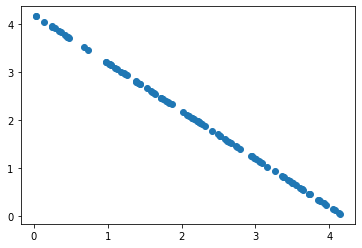

In [3]:
plt.scatter(x=aero.aero_state_mass[:, 0], y=aero.aero_state_mass[:, 1])

In [4]:


n_particles = 5000

radii = np.random.lognormal(mean=0, sigma=.3, size=n_particles)

aero = aero_state(n_particles, 
                  species={'species_1': {'density': 1},
                           'species_2': {'density': 1}},
                  particle_radius=radii,
                  verbose=False)

Text(0, 0.5, 'Species 2 Mass')

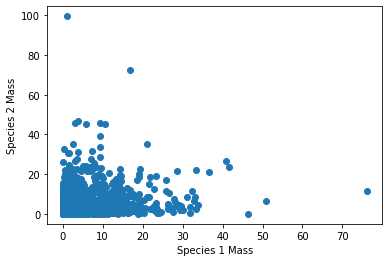

In [5]:
plt.scatter(x=aero.aero_state_mass[:, 0], y=aero.aero_state_mass[:, 1])
plt.xlabel('Species 1 Mass')
plt.ylabel('Species 2 Mass')

In [6]:
aero_radii = radii
n_bins = 20
bin_array = np.logspace(np.log10(aero_radii.min()), np.log10(aero_radii.max()), n_bins)

bin_counts = np.zeros(n_bins)
for i, (bin_min, bin_max) in enumerate(zip(bin_array[:-1], bin_array[1:])):
    bin_radii = aero_radii[(aero_radii > bin_min) & (aero_radii < bin_max)]
    bin_counts[i] = bin_radii.shape[0] / (np.log10(bin_max)- np.log10(bin_min))   

<BarContainer object of 20 artists>

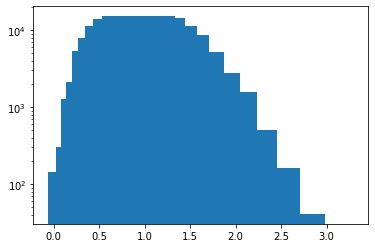

In [7]:
plt.bar(bin_array,bin_counts, log=True)

#from scipy.stats import lognorm
#sigma=0.3
#x = np.linspace(lognorm.ppf(0.00001, sigma), lognorm.ppf(0.9999, sigma), 100)
#plt.plot(x, 10000*lognorm.pdf(x, sigma), 'r-', lw=5, alpha=0.6, label='lognorm pdf')


In [8]:
mixing_states = []
for i in range(10000):
    aero = aero_state(n_particles=500, 
                    species={'species_1': {'density': 1},
                            'species_2': {'density': 1}},
                    particle_radius=1,
                    verbose=False)
    mixing_states.append(aero.mixing_state_index)




Text(0, 0.5, 'frequency')

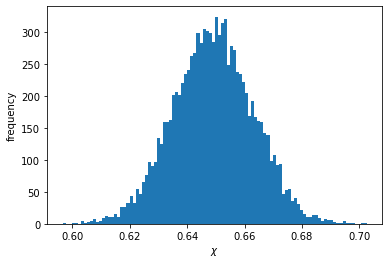

In [9]:
plt.hist(mixing_states, bins=100)
plt.xlabel('$\chi$')
plt.ylabel('frequency')

In [10]:
mixing_states = []
for i in range(10000):
    n_particles = 500
    radii = np.random.lognormal(mean=0, sigma=.3, size=n_particles)
    aero = aero_state(n_particles=n_particles, 
                    species={'species_1': {'density': 1},
                            'species_2': {'density': 1}},
                    particle_radius=radii,
                    verbose=False)
    mixing_states.append(aero.mixing_state_index)

Text(0, 0.5, 'frequency')

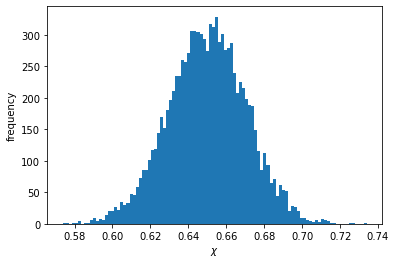

In [11]:
plt.hist(mixing_states, bins=100)
plt.xlabel('$\chi$')
plt.ylabel('frequency')

In [12]:
import numpy as np
x = np.random.rand(5)

In [13]:
x.round(2)

array([0.46, 0.11, 0.43, 0.77, 0.48])

In [14]:
def my_round(x, prec=2, base=0.05):
    return (base * (np.array(x) / base).round()).round(prec)

In [15]:
my_round(x)

array([0.45, 0.1 , 0.45, 0.75, 0.5 ])

In [16]:
len(str(0.05).split('.')[-1])

2

In [17]:
mixing_states_500 = []
Dalpha_500 = []
Dbeta_500 = []
Dgamma_500 = []
Di_500 = []
for i in range(10000):
    n_particles = 500
    radii = 1
    #radii = np.random.lognormal(mean=0, sigma=.3, size=n_particles)
    aero = aero_state(n_particles=n_particles, 
                    species={'species_1': {'density': 1},
                            'species_2': {'density': 1}},
                    particle_radius=radii,
                    #round_mass_frac_base=0.05,
                    verbose=False)
    mixing_states_500.append(aero.mixing_state_index)

    Dalpha_500.append(aero.avg_particle_species_diversity)
    Dgamma_500.append(aero.pop_bulk_species_diversity)
    Dbeta_500.append(aero.inter_particle_diversity)
    Di_500.extend(aero.particle_diversity)


In [18]:
mixing_states_100 = []
Dalpha_100 = []
Dbeta_100 = []
Dgamma_100 = []
Di_100 = []
for i in range(10000):
    n_particles = 100
    radii = 1
    #radii = np.random.lognormal(mean=0, sigma=.3, size=n_particles)
    aero = aero_state(n_particles=n_particles, 
                    species={'species_1': {'density': 1},
                            'species_2': {'density': 1}},
                    particle_radius=radii,
                    #round_mass_frac_base=0.05,
                    verbose=False)
    mixing_states_100.append(aero.mixing_state_index)
    Dalpha_100.append(aero.avg_particle_species_diversity)
    Dgamma_100.append(aero.pop_bulk_species_diversity)
    Dbeta_100.append(aero.inter_particle_diversity)
    Di_100.extend(aero.particle_diversity)

In [19]:
mixing_states_10 = []
Dalpha_10 = []
Dbeta_10 = []
Dgamma_10 = []
Di_10 = []
for i in range(10000):
    n_particles = 10
    radii = 1
    #radii = np.random.lognormal(mean=0, sigma=.3, size=n_particles)
    aero = aero_state(n_particles=n_particles, 
                    species={'species_1': {'density': 1},
                            'species_2': {'density': 1}},
                    particle_radius=radii,
                    #round_mass_frac_base=0.05,
                    verbose=False)
    mixing_states_10.append(aero.mixing_state_index)
    Dalpha_10.append(aero.avg_particle_species_diversity)
    Dgamma_10.append(aero.pop_bulk_species_diversity)
    Dbeta_10.append(aero.inter_particle_diversity)
    Di_10.extend(aero.particle_diversity)

Text(0.5, 1.0, '$\\chi$ distribution (10,000 stochastic monodisperse particle populations)')

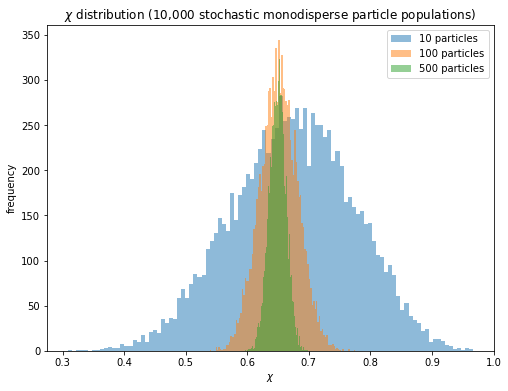

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.hist(mixing_states_10, bins=100, alpha=.5, label='10 particles')
ax.hist(mixing_states_100, bins=100, alpha=.5, label='100 particles')
ax.hist(mixing_states_500, bins=100, alpha=.5, label='500 particles')


plt.xlabel('$\chi$')
plt.ylabel('frequency')

plt.legend()
plt.title('$\chi$ distribution (10,000 stochastic monodisperse particle populations)')

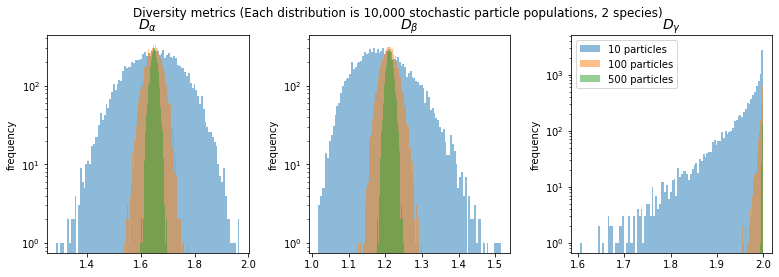

In [21]:
fig, ax = plt.subplots(1, 3, figsize=(13, 4))
plt.suptitle('Diversity metrics (Each distribution is 10,000 stochastic particle populations, 2 species)')

ax[0].hist(Dalpha_10, bins=100, alpha=.5, label='10 particles')
ax[0].hist(Dalpha_100, bins=100, alpha=.5, label='100 particles')
ax[0].hist(Dalpha_500, bins=100, alpha=.5, label='500 particles')
#ax[0].set_xlabel(r'$D_{\alpha}$')
ax[0].set_ylabel('frequency')
ax[0].set_yscale('log')
ax[0].set_title(r'$D_{\alpha}$', fontsize=14)


ax[1].hist(Dbeta_10, bins=100, alpha=.5, label='10 particles')
ax[1].hist(Dbeta_100, bins=100, alpha=.5, label='100 particles')
ax[1].hist(Dbeta_500, bins=100, alpha=.5, label='500 particles')
#ax[1].set_xlabel(r'$D_{\beta}$')
ax[1].set_ylabel('frequency')
ax[1].set_yscale('log')
ax[1].set_title(r'$D_{\beta}$', fontsize=14)

ax[2].hist(Dgamma_10, bins=100, alpha=.5, label='10 particles')
ax[2].hist(Dgamma_100, bins=100, alpha=.5, label='100 particles')
ax[2].hist(Dgamma_500, bins=100, alpha=.5, label='500 particles')
#ax[2].set_xlabel('$D_{\gamma}$')
ax[2].set_ylabel('frequency')
ax[2].set_yscale('log')
ax[2].set_title('$D_{\gamma}$', fontsize=14)

plt.subplots_adjust(wspace=.3)
plt.legend()


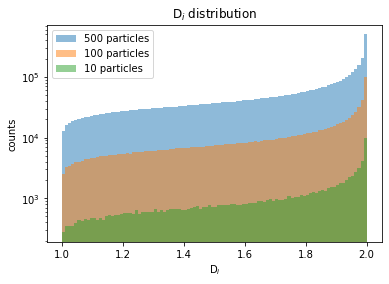

In [35]:
fig, ax = plt.subplots(1, 1)




ax.hist(Di_500, bins=100, alpha=.5, label='500 particles')
ax.hist(Di_100, bins=100, alpha=.5, label='100 particles')
ax.hist(Di_10, bins=100, alpha=.5, label='10 particles')

ax.set_title('D$_i$ distribution')
ax.set_ylabel('counts')
ax.set_xlabel('D$_i$')
ax.set_yscale('log')
plt.legend()

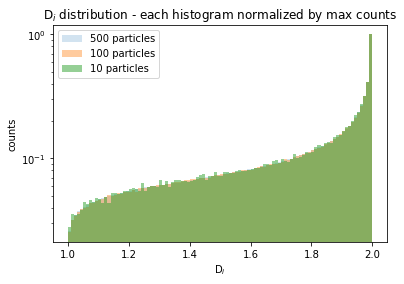

In [37]:
fig, ax = plt.subplots(1, 1)

(counts, bins) = np.histogram(Di_500, bins=100)
factor = 1 / counts.max()
ax.hist(bins[:-1], bins, weights=factor*counts, label='500 particles', alpha=.2)

(counts, bins) = np.histogram(Di_100, bins=100)
factor = 1 / counts.max()
ax.hist(bins[:-1], bins, weights=factor*counts, label='100 particles', alpha=.4)

(counts, bins) = np.histogram(Di_10, bins=100)
factor = 1 / counts.max()
ax.hist(bins[:-1], bins, weights=factor*counts, label='10 particles', alpha=.5)

ax.set_title('D$_i$ distribution - each histogram normalized by max counts')
ax.set_ylabel('counts')
ax.set_xlabel('D$_i$')
ax.set_yscale('log')
plt.legend()